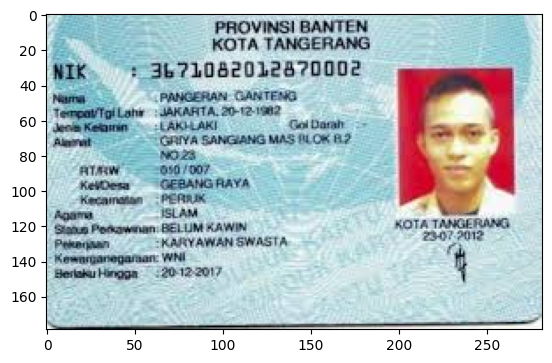

In [43]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('images.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

<h3> Tugas Praktikum </h3>

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

Text(0.5, 1.0, 'Citra Negative')

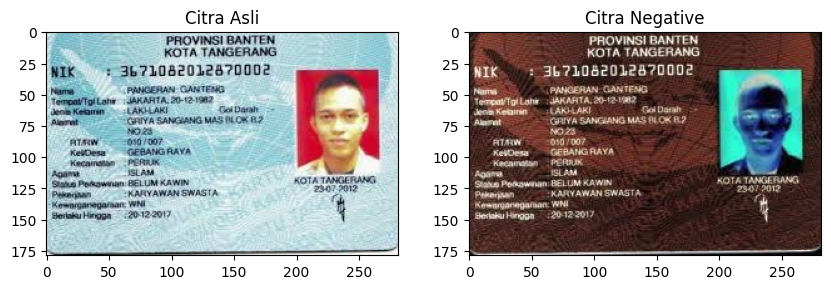

In [10]:
"""
Inverse Citra adalah proses yang digunakan untuk membalik nilai citra dengan cermin nilai
pixel tengah. Hasil yang didapatkan dikenal dengan nama citra negative. Proses ini juga
mudah sekali karena operasinya hanya mengurangkan nilai 255 dengan nilai pixel merah,
hijau, dan biru.
g(x) = 255 − f(x) , dimana g(x,y) adalah citra negative, dan f(x,y) adalah citra asli
"""

def inverse_citra(img):
    img = cv.imread('images.jpg')
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_negatif = 255 - img
    return img_negatif

img_negatif = inverse_citra(img)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img)
axs[0].set_title('Citra Asli')

axs[1].imshow(img_negatif)
axs[1].set_title('Citra Negative')


2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Masukkan tingkat kecerahan citra [-255 - 255]: 
59
Masukkan tingkat kontras citra [1.0 - 3.0]: 
2


Text(0.5, 1.0, 'Citra Contrast')

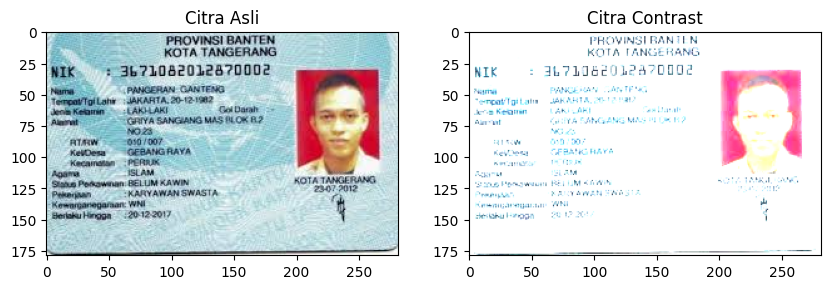

In [16]:
"""
Operasi contrast dapat dilakukan dengan memodifikasi formula yang digunakan pada linier
brightness, yaitu:
g(x, y) = a ∗ f(x, y) + b , dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah
nilai pixel asli, a adalah nilai contrast, dan b adalah nilai brightness.
"""


def transformasi_contrast(img, contrast, brightness):
    img = cv.imread('images.jpg')
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_contrast = contrast * img + brightness
    img_contrast = np.clip(img_contrast, 0, 255)  # Clip values to the valid range
    return img_contrast.astype(np.uint8)  # Convert to unsigned 8-bit integer type

print("Masukkan tingkat kecerahan citra [-255 - 255]: ")
brightness = int(input())

print("Masukkan tingkat kontras citra [1.0 - 3.0]: ")
contrast = float(input())

img_contrast = transformasi_contrast(img, contrast, brightness)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img)
axs[0].set_title('Citra Asli')

axs[1].imshow(img_contrast)
axs[1].set_title('Citra Contrast')


3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

Masukkan nilai kecerahan: 
50


Text(0.5, 1.0, 'Citra Log')

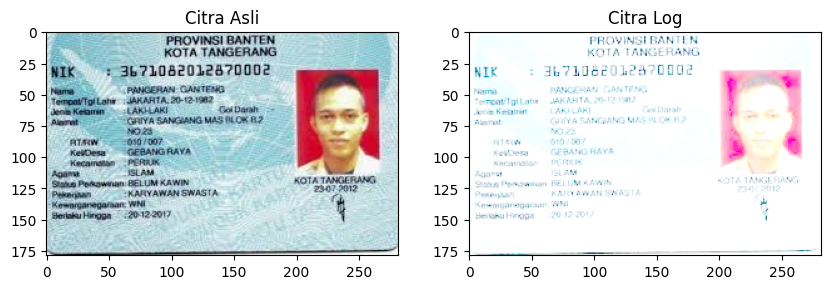

In [19]:
"""
Transformasi Log memetakan suatu citra dengan range warna sempit menjadi lebih lebar
pada citra output. Transformasi Logaritma berguna dalam penggambaran grafik apabila pada
deretan nilai terdapat selisih nilai yang sangat kecil maupun selisih nilai yang sangat besar,
sehingga selisih nilai yang sangat kecil tersebut akan sulit dilihat. Range input yang sempit dari
nilai gray level rendah dipetakan ke dalam range yang lebar pada output gray level.
Secara umum bentuk dari transfomasi log adalah:
s = c ∗ log(1 + r)

dimana
c : konstanta
r : nilai grey-level citra input
s : nilai grey-level citra output
"""

def transformasi_log(img, c):
    img = cv.imread('images.jpg')
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_log = c * np.log1p(img)  # Use np.log1p to avoid log(0)
    img_log = np.clip(img_log, 0, 255)  # Clip values to the valid range
    return img_log.astype(np.uint8)  # Convert to unsigned 8-bit integer type

print("Masukkan nilai kecerahan: ")
c = float(input())

img_log = transformasi_log(img, c)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img)
axs[0].set_title('Citra Asli')

axs[1].imshow(img_log)
axs[1].set_title('Citra Log')



4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

Text(0.5, 1.0, 'Grayscale Luminance')

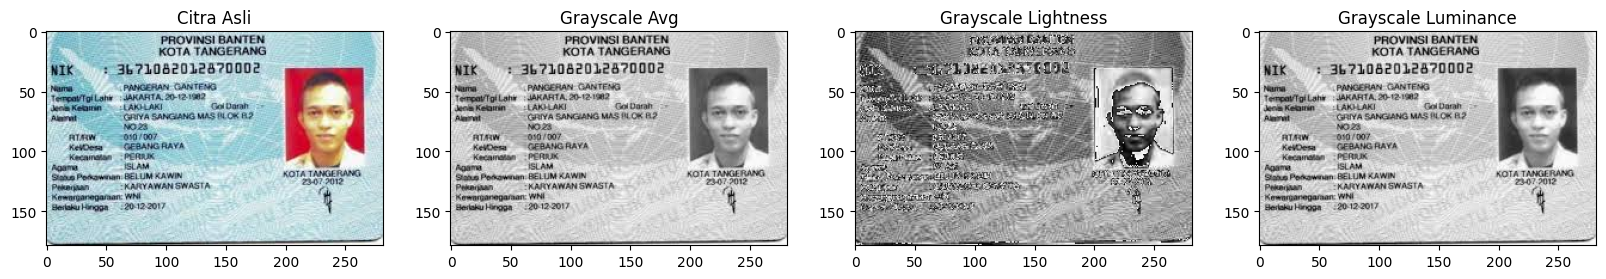

In [20]:
"""
Grayscale adalah citra keabuan dengan nilai intensitas kedalaman pixel 8 bit. Grayscale
biasanya dipakai untuk merepresentasikan intensitas cahaya pada jalur tunggal dari spectrum
electromagnet (inframerah, cahaya visible, ultraviolet, dsb). Beberapa metode grayscaling
yang sering dipakai adalah Averaging, Lightness, dan Luminance. Averaging ditentukan

dengan merata-rata nilai dari tiap channel R, G, dan B. Lightness ditentukan dengan merata-
rata nilai maksimum dan nilai minimum seluruh channel R, G, dan B. Sedangkan Luminance

(Luminosity) ditentukan dengan memberikan pembobotan yang disesuaikan dengan
spectrum visible yang paling banyak ada pada citra alami.

Grayscale avg = (R + G + B) / 3
Grayscale lightness = (max(R, G, B) + min(R, G, B)) / 2
Grayscale luminance = 0.21R + 0.72G + 0.07B
"""

def grayscale(img, method):
    img = cv.imread('images.jpg')
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    if method == 'avg':
        img_gray = np.mean(img, axis=2).astype(np.uint8)
    elif method == 'lightness':
        img_gray = (np.max(img, axis=2) + np.min(img, axis=2)) // 2
    elif method == 'luminance':
        img_gray = (0.21 * img[:, :, 0] + 0.72 * img[:, :, 1] + 0.07 * img[:, :, 2]).astype(np.uint8)
    return img_gray

img_gray_avg = grayscale(img, 'avg')
img_gray_lightness = grayscale(img, 'lightness')
img_gray_luminance = grayscale(img, 'luminance')

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(img)
axs[0].set_title('Citra Asli')

axs[1].imshow(img_gray_avg, cmap='gray')
axs[1].set_title('Grayscale Avg')

axs[2].imshow(img_gray_lightness, cmap='gray')
axs[2].set_title('Grayscale Lightness')

axs[3].imshow(img_gray_luminance, cmap='gray')
axs[3].set_title('Grayscale Luminance')

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

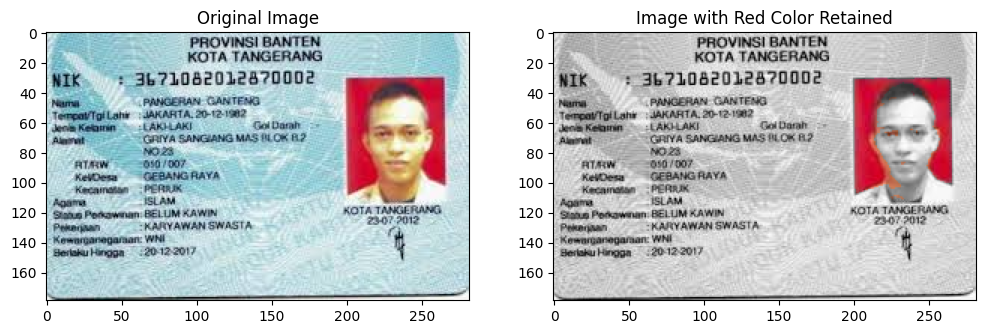

In [58]:
"""
Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:
"""
# Baca citra
img = cv.imread('images.jpg')

# Konversi citra dari BGR ke HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Tentukan batas bawah dan atas untuk warna merah dalam ruang warna HSV
lower_red1 = np.array([0, 120, 70])    # Batas bawah pertama untuk merah
upper_red1 = np.array([10, 255, 255])  # Batas atas pertama untuk merah

lower_red2 = np.array([170, 120, 70])  # Batas bawah kedua untuk merah
upper_red2 = np.array([180, 255, 255]) # Batas atas kedua untuk merah

# Buat dua mask untuk bagian merah di kedua area HSV
mask1 = cv.inRange(hsv, lower_red1, upper_red1)
mask2 = cv.inRange(hsv, lower_red2, upper_red2)

# Gabungkan kedua mask
mask = mask1 | mask2

# Buat citra grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Ubah citra grayscale menjadi 3 channel agar bisa digabungkan
gray_3_channel = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Ekstrak bagian berwarna merah menggunakan mask
colored_part = cv.bitwise_and(img, img, mask=mask)

# Gunakan mask inverse untuk bagian yang bukan merah dan gabungkan dengan citra grayscale
mask_inverse = cv.bitwise_not(mask)
gray_part = cv.bitwise_and(gray_3_channel, gray_3_channel, mask=mask_inverse)

# Gabungkan bagian berwarna merah dengan bagian grayscale
result = cv.add(colored_part, gray_part)

# Konversi hasil dari BGR ke RGB untuk ditampilkan menggunakan matplotlib
result_rgb = cv.cvtColor(result, cv.COLOR_BGR2RGB)

# Tampilkan citra asli dan hasil secara berdampingan
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Image with Red Color Retained')
plt.imshow(result_rgb)
plt.show()

